# Time Series Simulations

This notebook introduces the time domain simulations used in this project.

Time series are simulated using [neurodsp](https://neurodsp-tools.github.io/). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from neurodsp.sim import (sim_powerlaw, sim_synaptic_current, sim_oscillation,
                          sim_combined, sim_peak_oscillation)
from neurodsp.utils import create_times, set_random_seed
from neurodsp.plts import plot_time_series

In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.io import APMDB
from apm.sim.sim import sim_combined_peak
from apm.plts.data import plot_timeseries_and_psd
from apm.plts.settings import EXT

# Import simulation settings and pre-computed example signals
from apm.sim.settings import (N_SIMS, EXPS, KNEES, FREQS, POWERS, BWS,
                              SIM_PARAMS_AP, SIM_PARAMS_COMB, SIM_PARAMS_KNEE, SIM_PARAMS_PEAK)
from apm.sim.examples import TIMES, SIG_AP, SIG_KN, SIG_OSC, SIG_COMB, SIG_BURST, SIG_PEAK

In [3]:
# Set plot style
import seaborn as sns
sns.set_context('talk')

## Settings

First, we will define some settings for the simulations.

In [4]:
# Set random seed
set_random_seed(111)

In [5]:
# General simulation Settings
n_seconds = 10
fs = 500

# Component parameters
default_exp = -1.0
default_freq = 10
default_bw = 1.5
default_height = 1.5
f_range = (1, None)

In [6]:
# Collect together parameters for combined signals
comps_osc = {'sim_powerlaw' : {'exponent' : default_exp},
             'sim_oscillation' : {'freq' : default_freq}}
comps_burst = {'sim_powerlaw' : {'exponent' : default_exp},
               'sim_bursty_oscillation' : {'freq' : default_freq}}
peak_params = {'freq' : default_freq, 'bw' : default_bw, 'height' : default_height}

In [7]:
# Create a times vector for time series
times = create_times(n_seconds, fs)

In [8]:
# Plot settings
plt_kwargs = {'xlabel' : '', 'ylabel' : ''}

In [9]:
# Settings for saving figures
SAVE_FIG = False
FIGPATH = APMDB().figs_path / '11_ts_sims'

### Powerlaw Signal

First, we can simulate a 'powerlaw' signal, a 1/f signal that follow a powerlaw in the frequency domain. 

In [10]:
# Simulate a powerlaw signal
sig_pow = sim_powerlaw(n_seconds, fs, default_exp, f_range=f_range)

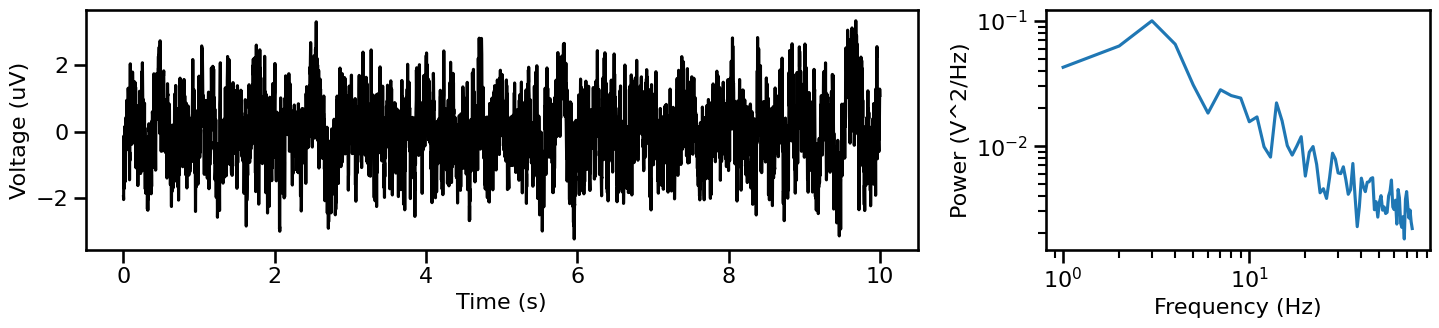

In [11]:
plot_timeseries_and_psd(times, sig_pow, fs,
                        save_fig=SAVE_FIG, file_name='powerlaw' + EXT, file_path=FIGPATH)

### Continuous Oscillation

Next, we can simulate an  oscillation, in this case, a continuous sinusoid.

In [12]:
# Simulate an oscillation
sig_osc = sim_oscillation(n_seconds, fs, freq=default_freq)

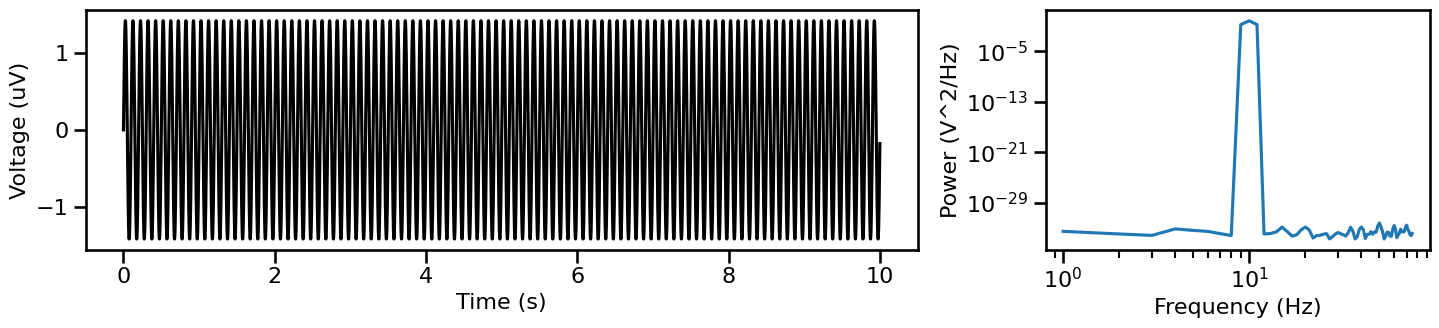

In [13]:
plot_timeseries_and_psd(times, sig_osc, fs,
                        save_fig=SAVE_FIG, file_name='oscillation' + EXT, file_path=FIGPATH)

### Combined Signal

Now we can can combine the aperiodic and periodic components from above, and create a combined signal.

In [14]:
# Simulate a combined signal, with an aperiodic and a periodic component
sig_comb = sim_combined(n_seconds, fs, comps_osc)

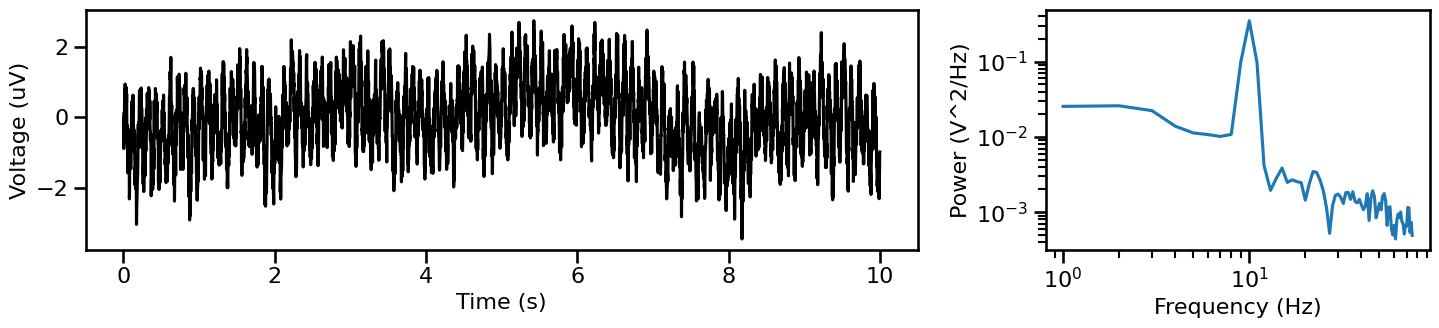

In [15]:
plot_timeseries_and_psd(times, sig_comb, fs,
                        save_fig=SAVE_FIG, file_name='combined' + EXT, file_path=FIGPATH)

### Synpatic Signal: Aperiodic Activity with a Knee

There are different possible ways to simulate aperiodic activity.

In this next simulation, we will simulate a 'synpatic current' model, which creates aperiodic activity with a knee.

In [16]:
# Simulate aperiodic activity from a synaptic current model
sig_kn = sim_synaptic_current(n_seconds, fs)

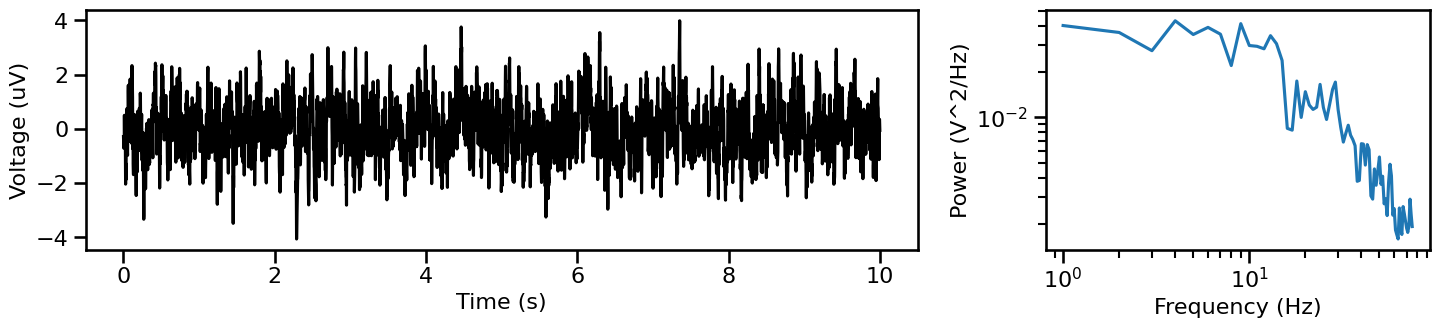

In [17]:
plot_timeseries_and_psd(times, sig_kn, fs,
                        save_fig=SAVE_FIG, file_name='syn_current' + EXT, file_path=FIGPATH)

### Bursty Oscillation

Oscillations are also not necessarily continuous. We we will simulate a combined signal with a bursty oscillation.

In [18]:
# Simulate a combined signal with a bursty oscillation
sig_burst = sim_combined(n_seconds, fs, comps_burst)

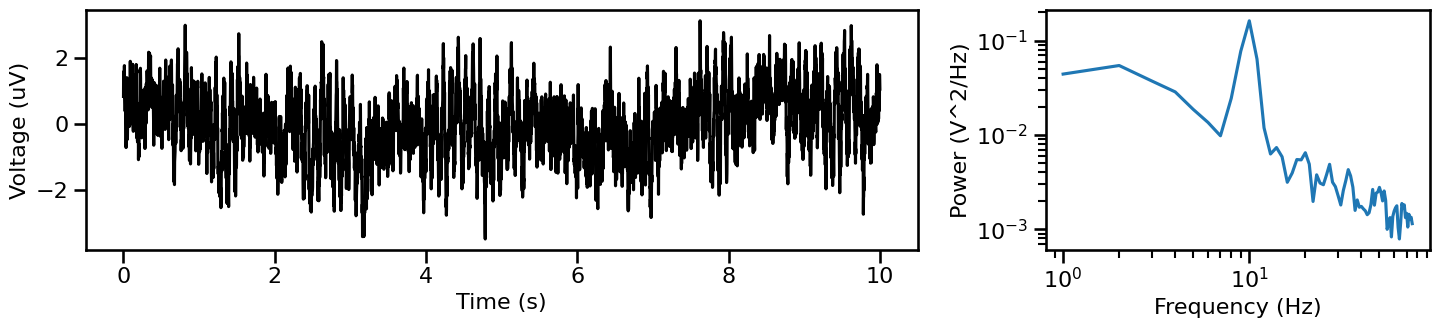

In [19]:
plot_timeseries_and_psd(times, sig_burst, fs,
                        save_fig=SAVE_FIG, file_name='bursty_osc' + EXT, file_path=FIGPATH)

### Peak Signal

Another dimension that signals can vary in is the bandwidth of a peak. Here, we will create a simulation in which we can specify the bandwidth of an oscillatory peak, that is simulated on top of an aperiodic component.

In [20]:
# Simulate a signal with a peak of a defined bandwidth
sig_peak = sim_peak_oscillation(sig_pow, fs, **peak_params)

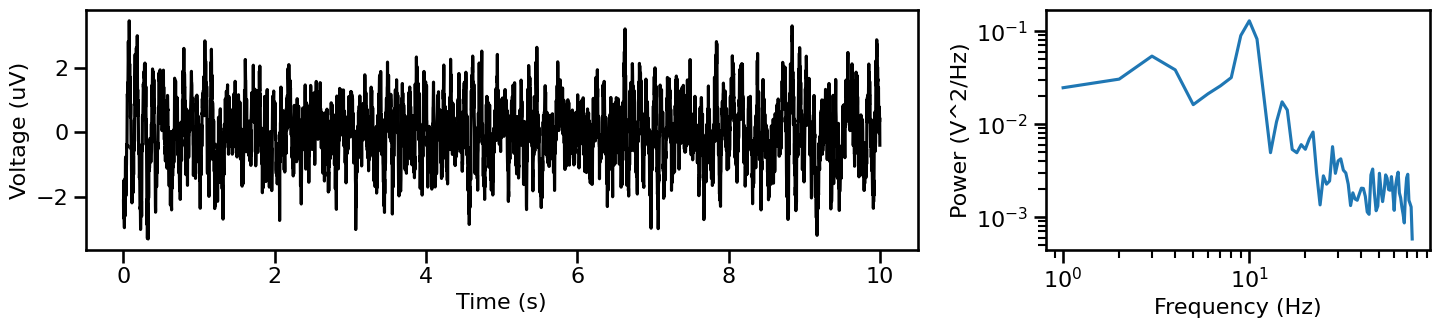

In [21]:
plot_timeseries_and_psd(times, sig_peak, fs,
                        save_fig=SAVE_FIG, file_name='peak' + EXT, file_path=FIGPATH)

## Example Time Series

In the notebooks that follow, you will see that measures are applied to a set of 'example' time series. 

These examples are time series that have been pre-computed, using the functions above. 

This set of example signals is shown here.

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


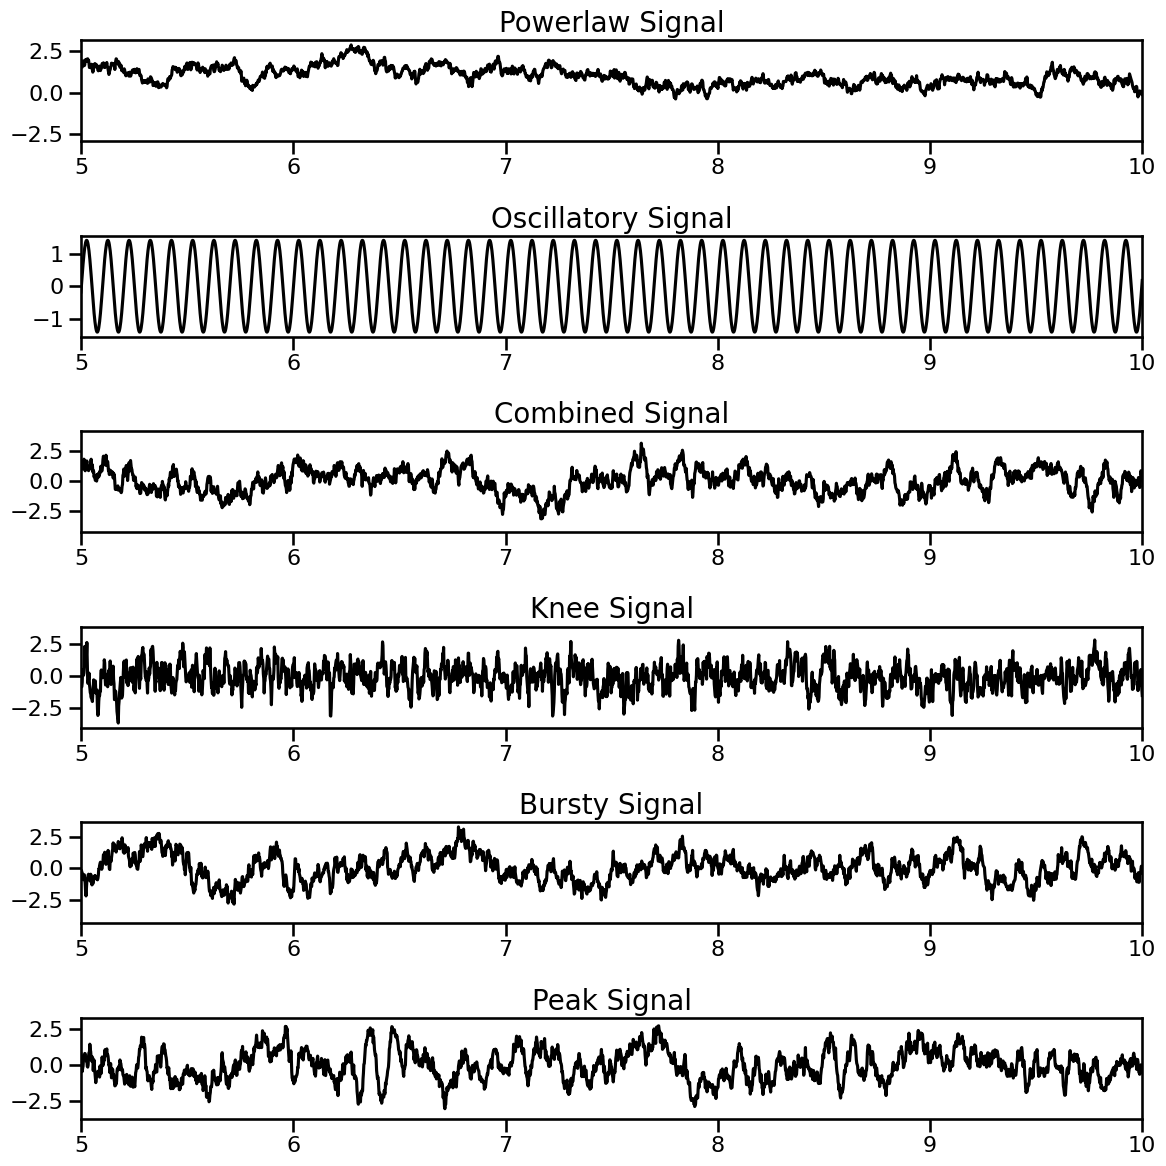

In [22]:
xlim = [5, 10]
_, axes = plt.subplots(6, 1, figsize=(12, 12))
plot_time_series(TIMES, SIG_AP, title='Powerlaw Signal', xlim=xlim, **plt_kwargs, ax=axes[0])
plot_time_series(TIMES, SIG_OSC, title='Oscillatory Signal', xlim=xlim, **plt_kwargs, ax=axes[1])
plot_time_series(TIMES, SIG_COMB, title='Combined Signal', xlim=xlim, **plt_kwargs, ax=axes[2])
plot_time_series(TIMES, SIG_KN, title='Knee Signal', xlim=xlim, **plt_kwargs, ax=axes[3])
plot_time_series(TIMES, SIG_BURST, title='Bursty Signal', xlim=xlim, **plt_kwargs, ax=axes[4])
plot_time_series(TIMES, SIG_PEAK, title='Peak Signal', xlim=xlim, **plt_kwargs, ax=axes[5])